In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("covid.csv")

In [3]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [6]:
#As date and time is an object datatype, converting this datatype into a time stamp
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [7]:
for i in ['Date','Time']:
    change_into_datetime(i)

In [8]:
data.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                        datetime64[ns]
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [9]:
data['Day']=data['Date'].dt.day

In [10]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day
0,1,2020-01-30,2021-03-18 18:00:00,Kerala,1,0,0,0,1,30
1,2,2020-01-31,2021-03-18 18:00:00,Kerala,1,0,0,0,1,31
2,3,2020-01-02,2021-03-18 18:00:00,Kerala,2,0,0,0,2,2
3,4,2020-02-02,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2
4,5,2020-03-02,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2


In [11]:
data['Month']=data['Date'].dt.month

In [12]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Month
0,1,2020-01-30,2021-03-18 18:00:00,Kerala,1,0,0,0,1,30,1
1,2,2020-01-31,2021-03-18 18:00:00,Kerala,1,0,0,0,1,31,1
2,3,2020-01-02,2021-03-18 18:00:00,Kerala,2,0,0,0,2,2,1
3,4,2020-02-02,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,2
4,5,2020-03-02,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,3


In [13]:
data.drop('Date', axis=1, inplace=True)

In [14]:
data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Month
0,1,2021-03-18 18:00:00,Kerala,1,0,0,0,1,30,1
1,2,2021-03-18 18:00:00,Kerala,1,0,0,0,1,31,1
2,3,2021-03-18 18:00:00,Kerala,2,0,0,0,2,2,1
3,4,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,2
4,5,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,3


In [15]:
def extract_hour(df,col):
    df[col+"_Hours"]=df[col].dt.hour
    
def extract_min(df,col):
    df[col+"_Mins"]=df[col].dt.minute

In [16]:
extract_hour(data,'Time')

In [17]:
extract_min(data,'Time')

In [18]:
data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Month,Time_Hours,Time_Mins
0,1,2021-03-18 18:00:00,Kerala,1,0,0,0,1,30,1,18,0
1,2,2021-03-18 18:00:00,Kerala,1,0,0,0,1,31,1,18,0
2,3,2021-03-18 18:00:00,Kerala,2,0,0,0,2,2,1,18,0
3,4,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,2,18,0
4,5,2021-03-18 18:00:00,Kerala,3,0,0,0,3,2,3,18,0


In [19]:
data.drop('Time', axis=1, inplace=True)

In [20]:
data.head()

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Day,Month,Time_Hours,Time_Mins
0,1,Kerala,1,0,0,0,1,30,1,18,0
1,2,Kerala,1,0,0,0,1,31,1,18,0
2,3,Kerala,2,0,0,0,2,2,1,18,0
3,4,Kerala,3,0,0,0,3,2,2,18,0
4,5,Kerala,3,0,0,0,3,2,3,18,0


In [21]:
data.shape

(9291, 11)

#### Deaths occured in particular State

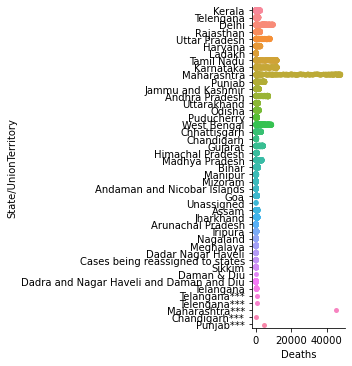

In [22]:
sns.catplot(x = "Deaths", y = "State/UnionTerritory",data = data)

As we can see, Maharashtra is the state with maximum deaths comparitive to other states.

#### Deaths Confirmed in Every State.

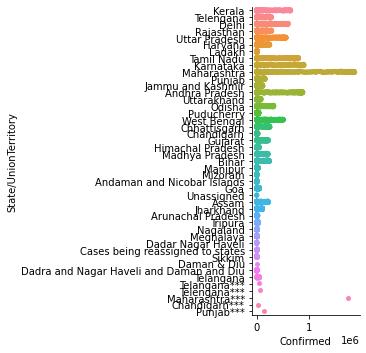

In [23]:
sns.catplot(x = "Confirmed", y = "State/UnionTerritory",data = data)

#### Deaths occured in particular months in the particular States.

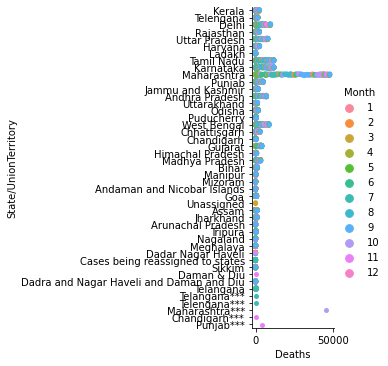

In [24]:
sns.catplot(x = "Deaths", y = "State/UnionTerritory",hue = "Month", data = data)

Most of the death happened from the month of July to September.